<h1 align="center">An Evaluation of the Top 2023 Streamed Spotify Tracks</h1>

<h2 align="center">A Tour Through the Data Science Lifecycle</h2>

<img align="center" src="Spotify-logo.png" width=100>
<p align="center">Image obtained from <a href="https://www.spotify.com/us/premium/">Spotify</a></p>

**Naaman Trumbull**

This project was completed independently as a final project for CMSC320: Introduction to Data Science at the University of Maryland. The purpose of this project is to analyze listening trends among users of Music Streaming platform *Spotify* in the year 2023.  


## Introduction
By August of 2012, the music streaming service, Spotify, had amassed 15 million global active users after being launched just 3 years earlier in the United Kingdom. Nearly 4 million of these users had subscribed to premium. The music streaming service was designed as a way for consumers to legally stream copyrighted music from their favorite artist. It launched in a time when rates of pirated music was at an all time high.

In 2023, Spotify reached 640 million active users. This included 236 million users who were subscribed to Premium. While Spotify may have initially been intended to be used as a means for users to listen to their favorite artists, it also turned into a tool for rising artists to grow their fanbases. New Artists to the platform now need to understand how to best use the platform in order to have the best commercial success with their music.

The main purpose of this analysis is to understand what features of a track can lead to a successful song on the platform. In this analysis, we will define success based on the total number of streams that a song gets. The more streams a song receives, the higher success it recevies.

In order to understand what types of features make a track successful on Spotify, we will analyze the top streamed tracks for the year 2023. Thru this journey, we will hope to answer the following questions:

1. Does the time of year the song is released impact total streams?
2. Does increasing the number of collaborators impact total streams?
3. What other factors could play a role in the overall success of a Spotify track?

These questions are important for rising artists to know about. The answers to these questions will help them to make important decisions about how they will promote their music so that they can gain more streams and grow their fanbases.

## Data Curation
As previously mentioned, we want to analyze tracks on the platform that we already know have a lot of streams on the platform in order to understand what features make a song successful.

The data which we will be curating was published on Kaggle by Nidula Elgiriyewithana in 2023. It is a dataset titled "Most Streamed Spotify Songs 2023."

Dataset Source: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

The following dataset contains the 953 most streamed songs of 2023. These are *not* the 953 most streamed songs on Spotify, but rather the songs that received the most streams during the year itself. The following features are included in the dataset for each song:
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

*This summary is copied straight from the Kaggle page linked above.



### Data input
We will now import and modify our data in order to prepare it for analysis.

We will be using pandas Dataframes in order to organize our data. We have downloaded and stored the data into a csv file titled "spotify-2023.csv." A summary of the contents of the database is read and imported into the dataframe below:


In [1]:
import pandas as pd # We will store our data as pandas Dataframes
import matplotlib.pyplot as plt
import numpy as np

# We need to specify the encoding of the CSV as 'latin-1' in order
# to parse the data correctly.
spotify_df = pd.read_csv("spotify-2023.csv", sep=',',  encoding='latin-1')
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Modifying the Release Date
Our first modification will be to combine the release year, day, and month, into one column in the dataframe. In the process, we will removed the `['released_year', 'released_month', 'released_day']` columns.

In [2]:
spotify_df['Release Date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                                     spotify_df['released_month'].astype(str) + '-' +
                                                     spotify_df['released_day'].astype(str),
                                                     errors='coerce')

spotify_df.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)
spotify_df.head(5)

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Release Date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


### Calculating Listenable Days
Later on in our analysis, we will wish to see if the time of when the song is released impacts the amount of streams it receives.

We want to add a column called `[listenable_days]` which displays the number of days that the song was available to be streamed in the year 2023. Some songs are released earlier in 2023 while other are released later in 2023. Some songs may have been released prior to 2023, meaning that they were available to stream for all 365 days of 2023.

For example, if the song was released 12/31/23, then the number of listenable days would be 1, but if it were released on 1/1/23 or earlier, then it would be 365.

We will now add this feature to our dataframe:

In [3]:
from datetime import datetime

def calculate_listenable_days(release_date):
  if release_date is pd.NaT:
    return 365

  if release_date.year > 2023:
    return 0

  if release_date.year < 2023:
    return 365

  end_of_year = datetime(2023, 12, 31)
  return (end_of_year - release_date).days + 1

spotify_df['listenable_days'] = spotify_df['Release Date'].apply(calculate_listenable_days)
spotify_df.head(15)

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Release Date,listenable_days
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,Major,80,89,83,31,0,8,4,2023-07-14,171
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,Major,71,61,74,7,0,10,4,2023-03-23,284
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,Major,51,32,53,17,0,31,6,2023-06-30,185
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,Major,55,58,72,11,0,11,15,2019-08-23,365
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,Minor,65,23,80,14,63,11,6,2023-05-18,228
5,Sprinter,"Dave, Central Cee",2,2186,91,183706234,67,213,88,17,...,Major,92,66,58,19,0,8,24,2023-06-01,214
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,3090,50,725980112,34,222,43,13,...,Minor,67,83,76,48,0,8,3,2023-03-16,291
7,Columbia,Quevedo,1,714,43,58149378,25,89,30,13,...,Major,67,26,71,37,0,11,4,2023-07-07,178
8,fukumean,Gunna,1,1096,83,95217315,60,210,48,11,...,Minor,85,22,62,12,0,28,9,2023-05-15,231
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2953,44,553634067,49,110,66,13,...,Minor,81,56,48,21,0,8,33,2023-03-17,290


### Fixing Types
We want to make sure that all types in the dataframe are being interpretted incorrectly. We do not want numeric or array-structured values to be interpretted as strings. Here, we go through each feature of the dataframe and ensure that all the values are being properly formatted.

In [4]:
spotify_df['artist_count'] = pd.to_numeric(spotify_df['artist_count'], errors='coerce')
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors='coerce')
spotify_df['in_deezer_charts'] = pd.to_numeric(spotify_df['in_deezer_charts'], errors='coerce')
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors='coerce')
spotify_df['bpm'] = pd.to_numeric(spotify_df['bpm'], errors='coerce')
spotify_df['danceability_%'] = pd.to_numeric(spotify_df['danceability_%'], errors='coerce')
spotify_df['valence_%'] = pd.to_numeric(spotify_df['valence_%'], errors='coerce')
spotify_df['energy_%'] = pd.to_numeric(spotify_df['energy_%'], errors='coerce')
spotify_df['acousticness_%'] = pd.to_numeric(spotify_df['acousticness_%'], errors='coerce')
spotify_df['instrumentalness_%'] = pd.to_numeric(spotify_df['instrumentalness_%'], errors='coerce')
spotify_df['liveness_%'] = pd.to_numeric(spotify_df['liveness_%'], errors='coerce')
spotify_df['speechiness_%'] = pd.to_numeric(spotify_df['speechiness_%'], errors='coerce')
spotify_df['in_spotify_playlists'] = pd.to_numeric(spotify_df['in_spotify_playlists'], errors='coerce')
spotify_df['in_spotify_charts'] = pd.to_numeric(spotify_df['in_spotify_charts'], errors='coerce')
spotify_df['in_apple_playlists'] = pd.to_numeric(spotify_df['in_apple_playlists'], errors='coerce')
spotify_df['in_apple_charts'] = pd.to_numeric(spotify_df['in_apple_charts'], errors='coerce')
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')
spotify_df.dropna(subset=['streams'], inplace=True)
spotify_df['streams'] = spotify_df['streams'].astype(int)
spotify_df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Release Date,listenable_days
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45.0,10,...,Major,80,89,83,31,0,8,4,2023-07-14,171
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58.0,14,...,Major,71,61,74,7,0,10,4,2023-03-23,284
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91.0,14,...,Major,51,32,53,17,0,31,6,2023-06-30,185
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125.0,12,...,Major,55,58,72,11,0,11,15,2019-08-23,365
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87.0,15,...,Minor,65,23,80,14,63,11,6,2023-05-18,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37.0,1,...,Major,60,24,39,57,0,8,3,2022-11-03,365
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8.0,0,...,Major,42,7,24,83,1,12,6,2022-10-21,365
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7.0,0,...,Major,80,81,67,4,0,8,6,2022-11-03,365
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17.0,0,...,Major,82,67,77,8,0,12,5,2022-10-20,365


## Exploratory Data Analysis



### Question 1: Does the time of year the song is released impact total streams?
Timing is extremely important for upcoming artists. How much time should there be in between releasing songs? Should a song be marketed as as Summer song or perhaps a Winter song? For high profile artist, the timing for when to release music is important for applying to win high profile awards such as a Grammy. If they release their music at the same time as other high profile artists, there may be too much competition, causing them to be erased by the competition. When looking at a year end summary, can we conclude that releasing earlier in the year equates to earning more streams?

In this section, I propose that for songs that were available to stream for 250 or more days in 2023 had more total streams than songs available to stream for less than 250 days.

#### Notation
- Let $\mu_L$ denote the mean streams of all songs that were available for less than 250 days in 2023.
- Let $\mu_M$ denote the mean streams of all songs that were available for at least 250 days in 2023.

**__Null Hypothesis:__** $\mu_M = \mu_L$ <br>
**__Alternative Hypothesis:__** $\mu_M - \mu_L > 0$

We need a sample to test this hypothesis, so we will use the most streamed songs of 2023 as our sample. We will then use a two sample Z test to compare how sample means of the streams for songs available less than 250 days compare to the mean streams for songs available at least 250 days. Note that we are missing streams info for one song. This row will be removed.

In [5]:
songs_less = spotify_df[spotify_df['listenable_days'] < 250]['streams']
songs_more = spotify_df[spotify_df['listenable_days'] >= 250]['streams']

songs_less = songs_less.dropna()
songs_more = songs_more.dropna()

print("Sample size of songs available less than 250 days in 2023")
display(songs_less.count())
print("Sample size of songs available at least 250 days in 2023")
display(songs_more.count())

Sample size of songs available less than 250 days in 2023


77

Sample size of songs available at least 250 days in 2023


875

Since our sample size for each group is greater than 30, we can use a two sample Z test.  

We now perform a two sample Z test to test our null hypothesis.

In [6]:
from statsmodels.stats.weightstats import ztest

z_stat, p_value = ztest(songs_more, songs_less)

print("Z-statistic:", z_stat)
print("P-value:", p_value)

Z-statistic: 4.762798043171452
P-value: 1.9092690070326802e-06


Since our p-value is nearly 0, we have a reasonable evidence to reject our null hypothesis. We have strong statistical evidence to support the fact that the mean streams of songs available for at least 250 days in 2023 is greater than that of those available for less than 250 days.

The following code creates a scatter plot showing the listenable days versus the total streams. As our hypothesis test shows, the number of streams increases as the number of listenable days increases.

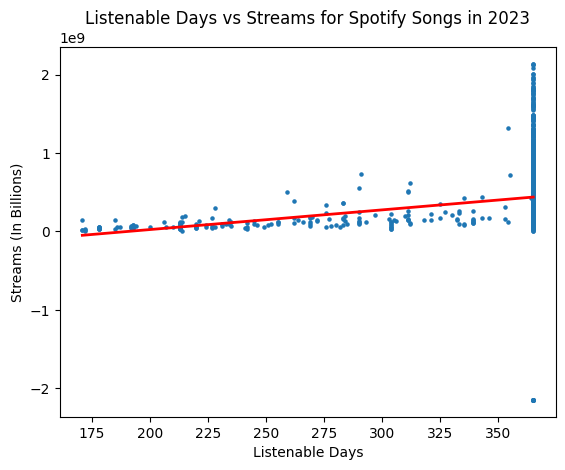

In [7]:
spotify_df.sort_values(by='streams', ascending=False)

to_chart = spotify_df[['listenable_days', 'streams']].dropna()

a, b = np.polyfit(to_chart['listenable_days'], to_chart['streams'], 1)

plt.scatter(to_chart['listenable_days'], to_chart['streams'], s=5)
plt.plot(to_chart['listenable_days'], a*to_chart['listenable_days'] + b, color='red', linewidth=2)

plt.title('Listenable Days vs Streams for Spotify Songs in 2023')
plt.xlabel('Listenable Days')
plt.ylabel('Streams (In Billions)')
plt.show()

### Question 2: Does increasing the number of collaborators impact total streams?
A popular tactic for upcoming artist is to collaborate with other artist in an attempt to bring fans from one fanbase to another. This is why it is common for up and coming artist to open for a larger artist who is on their tour.

The 2nd conclusion I would like to test is if the number of artist that are featured on a song increases the total streams a song receieves. Do collaborative songs generally have more streams themselves? This is the conclusion I want to analyze.

#### Notation

- Let $\mu_n$ represent the average streams for songs with $n$ contributing artists.

**Null Hypothesis:** $\mu_1 = \mu_2 = \ldots = \mu_n$ <br>
**Alternative Hypothesis:** At least one of the $\mu_n$ values differs from the other.

For our sample, we will again use the most popular songs on spotify of 2023. Let us group the songs by number of artist and see how many songs fall into each category.

In [8]:
total_artist_counts = spotify_df.groupby('artist_count')['streams'].count()
total_artist_counts

artist_count
1    586
2    254
3     85
4     15
5      5
6      3
7      2
8      2
Name: streams, dtype: int64

We have a significant number of tracks with 1, 2, and 3 artists. Since there sample sizes exceed 30, let us only consider the average streams of songs with only those number of artists for now. Because we are comparing three means, we will perform an ANOVA test.

In [9]:
from scipy.stats import f_oneway

one_artist = spotify_df[spotify_df['artist_count'] == 1]['streams']
two_artist = spotify_df[spotify_df['artist_count'] == 2]['streams']
three_artist = spotify_df[spotify_df['artist_count'] == 3]['streams']
f_stat, p_value = f_oneway(one_artist, two_artist, three_artist)

print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 4.034328257792548
P-value: 0.018010905217833037


If we use a 99% percent confidence level, then our p-value of .002 < .01. This means our p-value is small enough to reject our null hypothesis and conclude that the mean number of streams differs depending on the total number of artist. This is not enough information to tell us about how the means compare to each other so we will perform a post hoc analysis.

For our post hoc analysis, we will draw a line graph to show how the average streams compare depending on weather there is 1, 2, or 3 artists.

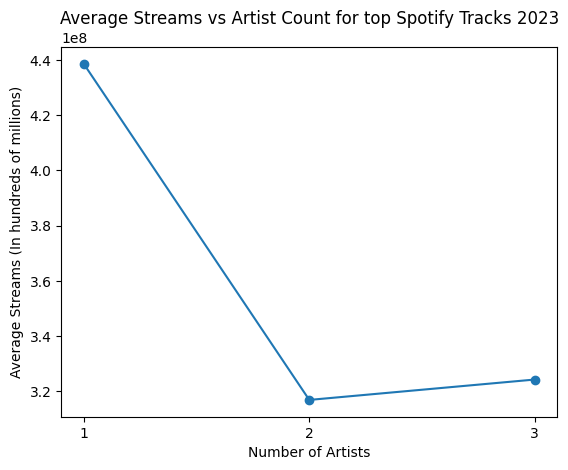

In [10]:
total_artist_means = spotify_df[spotify_df['artist_count'] <= 3].groupby('artist_count')['streams'].mean()
plt.plot(total_artist_means.index, total_artist_means.values, marker='o')
plt.title('Average Streams vs Artist Count for top Spotify Tracks 2023')
plt.xticks(total_artist_means.index)
plt.xlabel('Number of Artists')
plt.ylabel('Average Streams (In hundreds of millions)')
plt.show()

Although our sample size is small compared to the number of total tracks available to listen to on spotify, we can use this sample of tracks to conclude that the number of artists on a track can actually decrease streams.

I would be interested in trying different samples of tracks to see if this data trend repeated. I am curious if using only the most streamed tracks of the year would actually create bias in my results.

Earlier, when we were grouping the tracks by total artists, I noticed that there were fewer tracks that had 6, 7, or even 8 artists. I would consider these tracks to be outliers in this data.

## Bibliography

***Data Curation***

Nidula Elgiriyewithana. (2023). Most Streamed Spotify Songs 2023 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6367938
<br>
<br>
***Images***

Spotify Logo [Image]. Spotify. https://www.spotify.com/us/premium/
<br>
<br>
***Helpful Articles***

Colón, L. (2024, November 25). Spotify. Encyclopedia Britannica. https://www.britannica.com/topic/Spotify

https://www.businessofapps.com/data/spotify-statistics/

https://www.statista.com/statistics/367739/spotify-global-mau/

https://www.oberlo.com/statistics/how-many-spotify-premium-users-are-there

